# Final Dataset - Data Collection, Analysis, Wrangling, Feature Engineering

## Data Collection
To collect data we programmed a web scraper that would go through each listing that can currently (3 Apr 2020) be found on PropertyFinder.qa. From each listing we collected the following data: Value, Type, Reference, Bedrooms, Bathrooms, Furnishing, Size, Amenities, Agency, Location. These were then saved into a csv file named "PF_scrape_final.csv", which we will use for the project. There were a total of 6700+ properties listed, but some were not of a type we wanted so we ended up with exactly 6688 properties as entries in our dataset. These "bad" types were listings that were of type "Whole Building" or "Bulk Rent Units".

## Data Analysis

In [1]:
import pandas as pd

# Data ingestion
data = pd.read_csv("PF_scrape_final.csv")

In [2]:
# Data inspection
(records, fields) = data.shape
print('Our training data contains {} records/rows, each with {} fields/data attributes'.format(records, fields))

Our training data contains 6688 records/rows, each with 10 fields/data attributes


In [3]:
data.head()

,Value,Type,Reference,Bedrooms,Bathrooms,Furnishing,Size,Amenities,Agency,Location
0,"6,500 QAR Monthly",Apartment,AP2831,studio,1,Furnished,646 sq...,Central A/C - Concierge - Covered Parking - Ki...,Capstone Property,Marina Gate - Porto Arabia - The Pearl - Doha
1,"7,000 QAR Monthly",Apartment,AP2812,studio,1,Furnished,667 sq...,Central A/C - Concierge - Covered Parking - Ki...,Capstone Property,West Bay Villas - West Bay - West Bay - Doha
2,"6,700 QAR Monthly",Apartment,AP2820,studio,1,Furnished,646 sq...,Balcony - Central A/C - Concierge - Covered Pa...,Capstone Property,Imperial Diamond - Viva Bahriyah - The Pearl ...
3,"6,500 QAR Monthly",Apartment,AP2639B,studio,1,Partly furnished,657 sq...,Balcony - Built in Wardrobes - Central A/C - C...,Capstone Property,Viva West - Viva Bahriyah - The Pearl - Doha
4,"7,500 QAR Monthly",Apartment,403-WB-STU-FF,studio,1,Furnished,646 sq...,Built in Wardrobes - Central A/C - Concierge -...,ABHome Real Estate,West Bay Tower - West Bay - West Bay - Doha


In [4]:
dcols = data.columns
print('Our features have following titles:\n', ", ".join(dcols))

Our features have following titles:
 Value, Type, Reference, Bedrooms, Bathrooms, Furnishing, Size, Amenities, Agency, Location


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6688 entries, 0 to 6687
Data columns (total 10 columns):
Value         6688 non-null object
Type          6688 non-null object
Reference     6688 non-null object
Bedrooms      6688 non-null object
Bathrooms     6688 non-null object
Furnishing    6688 non-null object
Size          6621 non-null object
Amenities     6202 non-null object
Agency        6688 non-null object
Location      6620 non-null object
dtypes: object(10)
memory usage: 522.6+ KB


In [6]:
data.describe()

,Value,Type,Reference,Bedrooms,Bathrooms,Furnishing,Size,Amenities,Agency,Location
count,6688,6688,6688,6688,6688,6688,6621,6202,6688,6620
unique,292,7,6456,18,11,40,378,2279,205,444
top,"10,000 QAR Monthly",Apartment,tanweenproperties-1645513,2,2,Furnished,"1,292 ...",Balcony - Built in Wardrobes - Central A/C - C...,NelsonPark Property,Viva West - Viva Bahriyah - The Pearl - Doha
freq,363,4775,2,1941,2274,2783,310,135,600,384


In [7]:
import numpy as np
total_nan = np.sum(np.sum(data.isnull()))
print('\fTotal number of missing entries: {}\n'.format(total_nan))

Total number of missing entries: 621



*Summary of info about the our dataset*

This data set includes 6688 listings of properties to rent, including their value, type, reference, bedrooms, bathrooms, furnishing, size, agency, location and all the amenities they have.

The dataset includes 621 NaN values due to the fact that some listings did not record the nr of bethrooms and our webscraper then kept listing the subsequent features normally. So, the subsequent features (furnishing, size, amenities, agency, location) are placed in the row but shifted to the left by one.


The data reports:

- Value: price to rent the property in QAR per month (i.e. QAR Monthly)
- Type: description of the property (e.g. Apartment, Villa, Compound)
- Reference: unique identifiert of the listing, usually used only by the agency
- Bedrooms: number of bedrooms that are found in the property
- Bathrooms: number of bathrooms that are found in the property
- Furnishing: description of how much furniture is found in the property (e.g. Furnished, Partly furnished)
- Size: area of the property in square feet and square meters (i.e. sqft / sqm)
- Amenities: description of all the amenities that come with the property (e.g. Shared pool, Balcony, Security)
- Agency: name of the company that listed the property for rent
- Location: description of where the property is geographically found

<u>The question we are going to answer with this database:</u> Given a property with some features, what price should you list it online?

The values that are currently in the data set are all still string values that our webscraper copied from the site and wrote into the csv file, therefore it is not possible to make any type of graph or plot, so we will do this after we have wrangled our data.

In [8]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.dpi']= 100 # set the resolution to x dpi

import itertools

It seems like our data is too dirty to make any type of graph or plot, so we will do this after we have wrangled our data.

## Data Wrangling
Overview of what is to come: 
- Handle any NaNs
- Some entries did not have a bathroom number so the features after that got shifted to the left by one. We remove these entries.
- We need to change the type of value to a simple int by getting rid of "QAR Monthly" and comma in number.
- Clean Bedrooms column so that it contains a simple int with the total number of rooms
- We need to clean Size column because the entries strings are weird and we just want an int here too.
- The amenities column will be the hardest task. Because we need to get a list of all different posssible amenties and then we need to create a feature column for every single one of them and for every entry we need to either mark it true or false if that amenity was listed in their amenities or not. 
- Lastly, location will have to be cleaned up by simply turning the string of multiple locations into one single location, I think we should choose the second to last location because that is very general but more specific than Doha.


#### Imputing Missing Values

First, we check our data for missing values. We follow a 'backfill' approach to our imputations, based on intuition about the data at hand.

In [9]:
print('The amount of missing values (NaN) in each feature column are the following:')
for feature in data.columns:
    nan = np.sum(np.sum(data[feature].isnull()))
    print(f' - {feature}: {nan}')
total_nan = np.sum(np.sum(data.isnull()))
print(f'\nTotal: {total_nan}')

The amount of missing values (NaN) in each feature column are the following:
 - Value: 0
 - Type: 0
 - Reference: 0
 - Bedrooms: 0
 - Bathrooms: 0
 - Furnishing: 0
 - Size: 67
 - Amenities: 486
 - Agency: 0
 - Location: 68

Total: 621


We see that it is the **Ameneties**, **Size**, and **Location** columns that contain missing values.
We use 'bfill' to assign their new values.
In our dataset, we scraped the data on the site where they ordered the listings in ascending order by the "Bedrooms". So we assume that data in close proximity are somehow related, and therefore we use "bfill" as our method of imputation for missing values.

In [10]:
data = data.fillna(method='bfill')

total_nan = np.sum(np.sum(data.isnull()))
print(f'Total missing values: {total_nan}')

Total missing values: 0


#### Cleaning Value

In [11]:
# Let's start by converting all "Value" entries into a singular int
# This will be the price in QAR Monthly

def converted_values():
    '''
    We will use this function to return a list of all 
    values to be replaced
    '''    
    replacements = []
    for entry in data.loc[:, "Value"]:
        '''
        Each entry in the Values column is of the form: _ QAR Monthly
        So we split this string into a list of its contents, and select
        the first element, which is our desired integer
        '''
        entry_list = str.split(entry)
        value_str = entry_list[0] 
        # Remove the commas and convert to int
        value_int = int(value_str.replace(',',''))
        replacements.append(value_int)
    return replacements

data["Value"] = converted_values()
data["Value"]

0        6500
1        7000
2        6700
3        6500
4        7500
        ...  
6683    60000
6684    80000
6685    18000
6686    22000
6687    55000
Name: Value, Length: 6688, dtype: int64

#### Cleaning Bathrooms
Next, let us clean the **Bathrooms** entries.  

Due to a quirk in the webscraper, some entries did not have a bathroom number so the features after that got shifted to the left by one. These integer entries were then replaced by string entries from the **Furnishing** feature column. 
This column contains the following possible entries: *'Furnished', 'Partly furnished', 'Unfurnished'*  

*We will drop these entries*, as they are few enough not to make much of a difference on our results.

In [12]:
dropped_rows = []
indx = 0
for entry in data.loc[:, 'Bathrooms']:
    if entry in ['Furnished', 'Partly furnished', 'Unfurnished']:
        dropped_rows.append(indx)
    indx += 1
        
data = data.drop(dropped_rows)
data.loc[:, "Bathrooms"]

0        1
1        1
2        1
3        1
4        1
        ..
6683    7+
6684    7+
6685    7+
6686    7+
6687    7+
Name: Bathrooms, Length: 6620, dtype: object

Now that the Bathroom feature reflects accurate information, we also want it to contain simple integer values.
We do this by converting all "7+" values into 8, and all other values into their integer counterparts.

In [13]:
# replacing '7+'
data = data.replace({'Bathrooms':'7+'}, 8)
# converting to integers
data['Bathrooms'] = [int(x) for x in data['Bathrooms']]

data['Bathrooms']

0       1
1       1
2       1
3       1
4       1
       ..
6683    8
6684    8
6685    8
6686    8
6687    8
Name: Bathrooms, Length: 6620, dtype: int64

#### Cleaning Size

We now move to the **Size** column. Each entry is of the form: "x sqft / y sqm".  
We are really only interested in the square metrege, so if we *split* each entry and retrieve the *fourth element* only, this is what we obtain.

In [14]:
# We also need to make sure to remove commas from y so that 
# it may be converted to an integer
sqm_list = [int(y.split()[3].replace(",", "")) for y in data.loc[:, "Size"]]

data["Size"] = sqm_list
data["Size"]

0         60
1         62
2         60
3         61
4         60
        ... 
6683    1250
6684    1225
6685     375
6686     350
6687    2000
Name: Size, Length: 6620, dtype: int64

#### Cleaning Location

We now move to the **Location** feature. 

Each entry looks something like this: "Street Number - Street Name - Province - Doha" 

Some have less, but all have "Doha" at the end. The most general location that is less general than "Doha" is the one right before it, so that is the one we retain. This is the second-to-last entry of each.

In [15]:
prov_list = [location.split(" - ")[-2].strip() for location in data.loc[:, 'Location']]

data["Location"] = prov_list
data["Location"]

0        The Pearl
1         West Bay
2        The Pearl
3        The Pearl
4         West Bay
           ...    
6683      Al Dafna
6684      Al Dafna
6685      Al Hilal
6686      Al Hilal
6687    Ain Khaled
Name: Location, Length: 6620, dtype: object

#### Cleaning Bedrooms

Next is **Bedrooms**.  
Most are simple strings of a single number, but there more interesting values as well. These take one of the following forms: 
- "studio"
- "7+"
- "x + Maids Room"

In the case of "studio", we simply change the entry to the integer 1.  
In the case of "7+", we do as before and simply modify the value to the integer *8*.  
In the case of some *x* (where *x* can be a number or one of the above cases) followed by "+ Maids Room", we take that *x* value and increase it by one.

In [16]:
data["Bedrooms"]

0                studio
1                studio
2                studio
3                studio
4                studio
             ...       
6683    7+ + Maids Room
6684    7+ + Maids Room
6685                 7+
6686    7+ + Maids Room
6687                 7+
Name: Bedrooms, Length: 6620, dtype: object

In [17]:
# Finding and changing "studio" to "1" and "7+" to "8",
# as well as their "+ Maids Room" counterparts
data = data.replace({'Bedrooms':'7+'}, '8')
data = data.replace({'Bedrooms':'7+ + Maids Room'}, '9')
data = data.replace({'Bedrooms':'studio'}, '1')
data = data.replace({'Bedrooms':'studio + Maids Room'}, '2')

# Converting the rest of the entries
replacements = []
for entry in data.loc[:, "Bedrooms"]:
    # Only those entries longer than 1 contain "+ Maids Room"
    if len(entry) > 1:
        replacements.append(int(entry[0]) + 1)
    else:
        replacements.append(int(entry))

data['Bedrooms'] = replacements
data['Bedrooms']
        

0       1
1       1
2       1
3       1
4       1
       ..
6683    9
6684    9
6685    8
6686    9
6687    8
Name: Bedrooms, Length: 6620, dtype: int64

#### Cleaning Amenities

Lastly, we have **Amenities**.  

First, we create a set of all possible amenities.

In [18]:
data.loc[:, "Amenities"]

0       Central A/C - Concierge - Covered Parking - Ki...
1       Central A/C - Concierge - Covered Parking - Ki...
2       Balcony - Central A/C - Concierge - Covered Pa...
3       Balcony - Built in Wardrobes - Central A/C - C...
4       Built in Wardrobes - Central A/C - Concierge -...
                              ...                        
6683    Balcony - Built in Wardrobes - Maid Service - ...
6684    Balcony - Built in Wardrobes - Central A/C - C...
6685    Balcony - Covered Parking - Maids Room - Pets ...
6686    Balcony - Covered Parking - Maids Room - Pets ...
6687                                         Pets Allowed
Name: Amenities, Length: 6620, dtype: object

In [19]:
amset = set()
for entry in data.loc[:, "Amenities"]:
    for amenity in entry.split(" - "):
        amset.add(amenity)

amset

{'Balcony',
 'Barbecue Area',
 'Built in Wardrobes',
 'Central A/C',
 "Children's Play Area",
 "Children's Pool",
 'Concierge',
 'Covered Parking',
 'Kitchen Appliances',
 'Lobby in Building',
 'MD Properties',
 'Maid Service',
 'Maids Room',
 'Networked',
 'Pets Allowed',
 'Private Garden',
 'Private Gym',
 'Private Jacuzzi',
 'Private Pool',
 'Security',
 'Shared Gym',
 'Shared Pool',
 'Shared Spa',
 'Study',
 'View of Landmark',
 'View of Water',
 'Walk-in Closet'}

Next, we replace the string values in the **Amenities** column with a *list* of its amenities, so that it is easier to work with. And we add a new feature that represents the number of amenities the property has. We think this might be more useful than the individual amenities it has.

In [20]:
am_lists = [entry.split(" - ") for entry in data.loc[:, "Amenities"]]
nr_am_list = [len(am_l) for am_l in am_lists]
            
data['Amenities'] = am_lists
data['Nr of amenities'] = nr_am_list
print(data['Amenities'])
print(data['Nr of amenities'])

0       [Central A/C, Concierge, Covered Parking, Kitc...
1       [Central A/C, Concierge, Covered Parking, Kitc...
2       [Balcony, Central A/C, Concierge, Covered Park...
3       [Balcony, Built in Wardrobes, Central A/C, Con...
4       [Built in Wardrobes, Central A/C, Concierge, K...
                              ...                        
6683    [Balcony, Built in Wardrobes, Maid Service, Ma...
6684    [Balcony, Built in Wardrobes, Central A/C, Cov...
6685    [Balcony, Covered Parking, Maids Room, Pets Al...
6686    [Balcony, Covered Parking, Maids Room, Pets Al...
6687                                       [Pets Allowed]
Name: Amenities, Length: 6620, dtype: object
0        8
1        8
2        9
3       10
4       10
        ..
6683     5
6684    10
6685     5
6686     5
6687     1
Name: Nr of amenities, Length: 6620, dtype: int64


Now we binarize the amenities and delete the old amenities column.

In [21]:
from sklearn.preprocessing import MultiLabelBinarizer
s = data['Amenities']
mlb = MultiLabelBinarizer()
df_amenities = pd.DataFrame(mlb.fit_transform(s),columns=mlb.classes_, index=data.index)

In [22]:
del data['Amenities']
data = pd.concat([data, df_amenities], axis=1)

In this step we replaced the **Amenities** column with *multiple* columns depending on all the available amenities that can be found in the entry - these are of type boolean (1 or 0).

In [23]:
dcols = data.columns
print('Our features have following titles now:\n', ", ".join(dcols))

Our features have following titles now:
 Value, Type, Reference, Bedrooms, Bathrooms, Furnishing, Size, Agency, Location, Nr of amenities, Balcony, Barbecue Area, Built in Wardrobes, Central A/C, Children's Play Area, Children's Pool, Concierge, Covered Parking, Kitchen Appliances, Lobby in Building, MD Properties, Maid Service, Maids Room, Networked, Pets Allowed, Private Garden, Private Gym, Private Jacuzzi, Private Pool, Security, Shared Gym, Shared Pool, Shared Spa, Study, View of Landmark, View of Water, Walk-in Closet


In [24]:
data

,Value,Type,Reference,Bedrooms,Bathrooms,Furnishing,Size,Agency,Location,Nr of amenities,...,Private Jacuzzi,Private Pool,Security,Shared Gym,Shared Pool,Shared Spa,Study,View of Landmark,View of Water,Walk-in Closet
0,6500,Apartment,AP2831,1,1,Furnished,60,Capstone Property,The Pearl,8,...,0,0,1,1,1,0,0,0,1,0
1,7000,Apartment,AP2812,1,1,Furnished,62,Capstone Property,West Bay,8,...,0,0,1,1,1,0,0,0,1,0
2,6700,Apartment,AP2820,1,1,Furnished,60,Capstone Property,The Pearl,9,...,0,0,1,1,1,0,0,0,1,0
3,6500,Apartment,AP2639B,1,1,Partly furnished,61,Capstone Property,The Pearl,10,...,0,0,1,1,1,0,0,0,1,0
4,7500,Apartment,403-WB-STU-FF,1,1,Furnished,60,ABHome Real Estate,West Bay,10,...,0,0,1,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6683,60000,Villa,j-L529148,9,8,Unfurnished,1250,Steps Real Estate,Al Dafna,5,...,0,0,0,0,0,0,0,1,0,0
6684,80000,Villa,nelsonpark-1891392,9,8,Unfurnished,1225,NelsonPark Property,Al Dafna,10,...,1,1,0,0,0,1,0,0,0,0
6685,18000,Villa,FBCM-M0221,8,8,Unfurnished,375,Future Business,Al Hilal,5,...,0,0,0,0,0,0,0,0,0,0
6686,22000,Villa,545,9,8,Unfurnished,350,GOLDEN KEY LUXURY REAL ESTATE,Al Hilal,5,...,0,0,0,0,0,0,0,0,0,0


## Back to Analysis

Now that our code is clean, we are able to do some basic analysis. </br>
First we will make some graphs combining all features that are numerical.

Feature pairings: [(0, 1), (0, 2), (0, 3), (0, 4), (1, 2), (1, 3), (1, 4), (2, 3), (2, 4), (3, 4)]
[[<matplotlib.axes._subplots.AxesSubplot object at 0x1a17f4ec90>


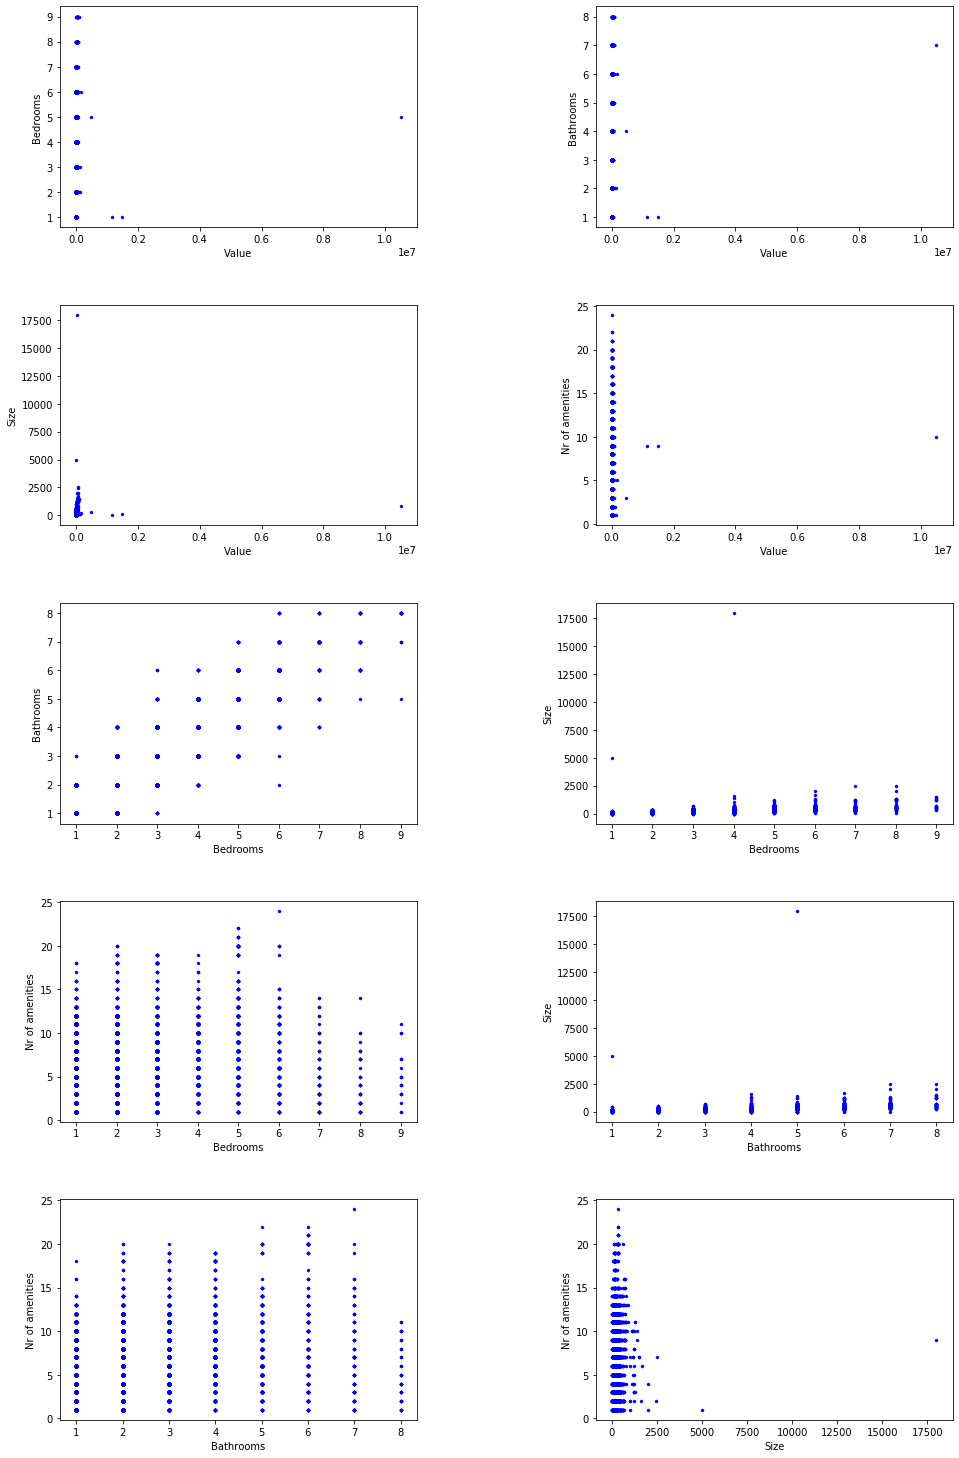

In [25]:
# all subsets of size 2 in the feature set: all possible pairings of features
possible_features = [feat for feat in dcols if feat in ['Value', 'Bathrooms', 'Bedrooms', 'Size', 'Nr of amenities']]
feature_pairings = list(itertools.combinations(range(len(possible_features)), 2))
print("Feature pairings:", feature_pairings)

# we'll show the plots in a matrix of three columns
ncols = 2
nrows = int(len(feature_pairings) // ncols)

figure, subplots = plt.subplots(nrows, ncols, figsize=(16, 26))

print(subplots)
k = 0 # iterates over the feature pairings
for i in range(nrows):
    for j in range(ncols):
        
        feature_x = feature_pairings[k][0]
        feature_y = feature_pairings[k][1]
        k += 1

        subplots[i][j].set_xlabel(possible_features[feature_x])
        subplots[i][j].set_ylabel(possible_features[feature_y])

        subplots[i][j].scatter(data[possible_features[feature_x]], 
                               data[possible_features[feature_y]],
                               facecolors='blue', linewidths=0.20, s=10)
    
plt.subplots_adjust(left=None, bottom=None, right=None, 
                    top=None, wspace=0.5, hspace=0.35)
plt.show()

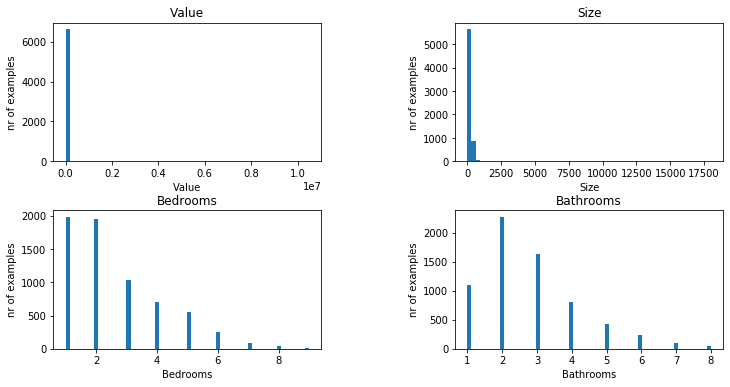

In [26]:
nrows = 2
ncols = 2
figure, subplots = plt.subplots(nrows, ncols, figsize=(12, 6))

titles = ["Value", "Size", "Bedrooms", "Bathrooms"]

for i in range(nrows):
    for j in range(ncols):
        subplots[i, j].hist(data[titles[(2*i)+j]], bins=60)
        subplots[i, j].set_xlabel(titles[(2*i)+j])
        subplots[i, j].set_ylabel('nr of examples')
        subplots[i, j].set_title(titles[(2*i)+j])
       
plt.subplots_adjust(left=None, bottom=None, right=None, 
                    top=None, wspace=0.5, hspace=0.35)

plt.show()

By viewing some of these graphs and the histograms, we see that we have some outliers. These outliers are found in the Value and Size features.

#### Removing Outliers
  
We will do this using the parametric rule of thumb: 3$\sigma$ cut-off only on the columns of Value and Size.

- **Three standard deviations from the mean is a common cut-off in practice for identifying outliers in a Gaussian or Gaussian-like distribution.**<br><p> 

In [27]:
# not specific assumption: mean and std are estimated from the data

outlier_data = data[["Value","Size"]]

data_mean, data_std = np.mean(outlier_data), np.std(outlier_data)

cut_off = 3 * data_std 

lower, upper = data_mean - cut_off, data_mean + cut_off

# print('lower cut-off: {:.3f} - upper cut-off: {:.3f}'.format(lower, upper))

In [28]:
# identify outliers
outliers = outlier_data[ (outlier_data < lower) | (outlier_data > upper) ]

np.set_printoptions(precision=3)

total_outlier_nan = (outliers.shape[0]*outliers.shape[1]) - np.sum(np.sum(outliers.isnull()))
print(f'Total number of outliers in Values and Size columns: {total_outlier_nan}')

print('Outliers:', outliers)

Total number of outliers in Values and Size columns: 40
Outliers:       Value    Size
0       NaN     NaN
1       NaN     NaN
2       NaN     NaN
3       NaN     NaN
4       NaN     NaN
...     ...     ...
6683    NaN  1250.0
6684    NaN  1225.0
6685    NaN     NaN
6686    NaN     NaN
6687    NaN  2000.0

[6620 rows x 2 columns]


In [29]:
outlier_clean = outlier_data[ (outlier_data > lower) & (outlier_data < upper) ]

In [30]:
outlier_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6620 entries, 0 to 6687
Data columns (total 2 columns):
Value    6616 non-null float64
Size     6584 non-null float64
dtypes: float64(2)
memory usage: 155.2 KB


In [31]:
del data['Value']
del data['Size']
data

,Type,Reference,Bedrooms,Bathrooms,Furnishing,Agency,Location,Nr of amenities,Balcony,Barbecue Area,...,Private Jacuzzi,Private Pool,Security,Shared Gym,Shared Pool,Shared Spa,Study,View of Landmark,View of Water,Walk-in Closet
0,Apartment,AP2831,1,1,Furnished,Capstone Property,The Pearl,8,0,0,...,0,0,1,1,1,0,0,0,1,0
1,Apartment,AP2812,1,1,Furnished,Capstone Property,West Bay,8,0,0,...,0,0,1,1,1,0,0,0,1,0
2,Apartment,AP2820,1,1,Furnished,Capstone Property,The Pearl,9,1,0,...,0,0,1,1,1,0,0,0,1,0
3,Apartment,AP2639B,1,1,Partly furnished,Capstone Property,The Pearl,10,1,0,...,0,0,1,1,1,0,0,0,1,0
4,Apartment,403-WB-STU-FF,1,1,Furnished,ABHome Real Estate,West Bay,10,0,0,...,0,0,1,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6683,Villa,j-L529148,9,8,Unfurnished,Steps Real Estate,Al Dafna,5,1,0,...,0,0,0,0,0,0,0,1,0,0
6684,Villa,nelsonpark-1891392,9,8,Unfurnished,NelsonPark Property,Al Dafna,10,1,0,...,1,1,0,0,0,1,0,0,0,0
6685,Villa,FBCM-M0221,8,8,Unfurnished,Future Business,Al Hilal,5,1,0,...,0,0,0,0,0,0,0,0,0,0
6686,Villa,545,9,8,Unfurnished,GOLDEN KEY LUXURY REAL ESTATE,Al Hilal,5,1,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
result = pd.concat([outlier_clean, data], axis=1, sort=False)
result = result[result['Value'].notna()]
result = result[result['Size'].notna()]
result

,Value,Size,Type,Reference,Bedrooms,Bathrooms,Furnishing,Agency,Location,Nr of amenities,...,Private Jacuzzi,Private Pool,Security,Shared Gym,Shared Pool,Shared Spa,Study,View of Landmark,View of Water,Walk-in Closet
0,6500.0,60.0,Apartment,AP2831,1,1,Furnished,Capstone Property,The Pearl,8,...,0,0,1,1,1,0,0,0,1,0
1,7000.0,62.0,Apartment,AP2812,1,1,Furnished,Capstone Property,West Bay,8,...,0,0,1,1,1,0,0,0,1,0
2,6700.0,60.0,Apartment,AP2820,1,1,Furnished,Capstone Property,The Pearl,9,...,0,0,1,1,1,0,0,0,1,0
3,6500.0,61.0,Apartment,AP2639B,1,1,Partly furnished,Capstone Property,The Pearl,10,...,0,0,1,1,1,0,0,0,1,0
4,7500.0,60.0,Apartment,403-WB-STU-FF,1,1,Furnished,ABHome Real Estate,West Bay,10,...,0,0,1,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6680,35000.0,700.0,Villa,j-L529080,9,7,Unfurnished,Steps Real Estate,Al Duhail,1,...,0,0,0,0,0,0,0,0,0,0
6681,30000.0,680.0,Villa,W1-L509006,8,6,Unfurnished,Steps Real Estate,Ain Khaled,2,...,0,0,0,0,0,0,0,0,0,0
6682,15000.0,400.0,Villa,N1-L498991,8,7,Unfurnished,Steps Real Estate,Al Gharrafa,5,...,0,0,0,0,0,0,0,1,0,0
6685,18000.0,375.0,Villa,FBCM-M0221,8,8,Unfurnished,Future Business,Al Hilal,5,...,0,0,0,0,0,0,0,0,0,0


Feature pairings: [(0, 1), (0, 2), (0, 3), (0, 4), (1, 2), (1, 3), (1, 4), (2, 3), (2, 4), (3, 4)]
[[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1a72ac90>


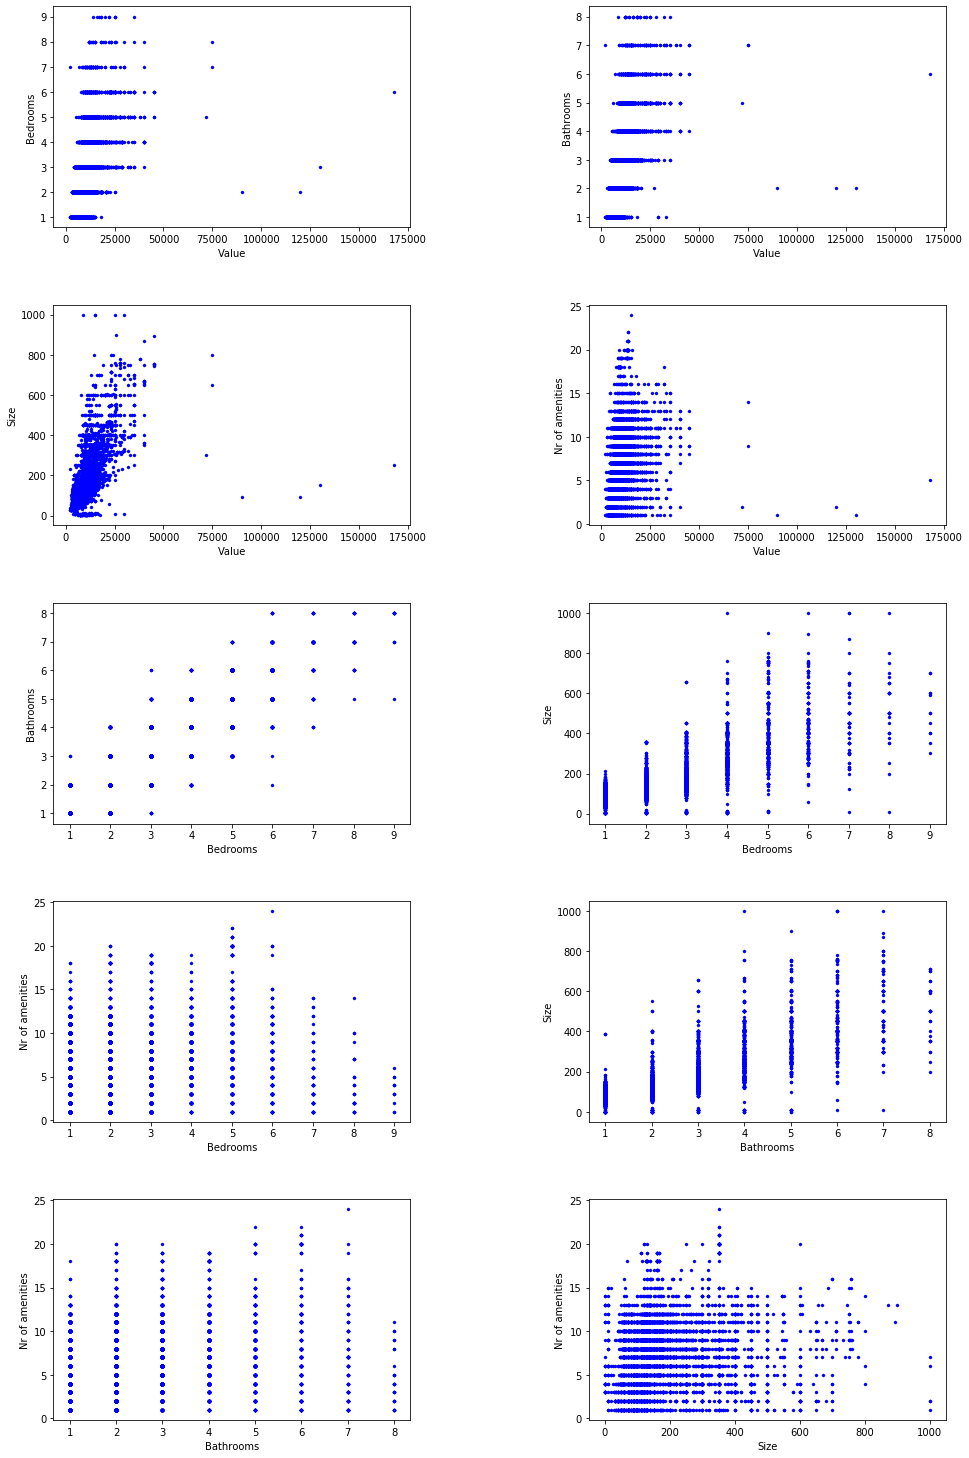

In [33]:
# all subsets of size 2 in the feature set: all possible pairings of features
possible_features = [feat for feat in dcols if feat in ['Value', 'Bathrooms', 'Bedrooms', 'Size', 'Nr of amenities']]
feature_pairings = list(itertools.combinations(range(len(possible_features)), 2))
print("Feature pairings:", feature_pairings)

# we'll show the plots in a matrix of three columns
ncols = 2
nrows = int(len(feature_pairings) // ncols)

figure, subplots = plt.subplots(nrows, ncols, figsize=(16, 26))

print(subplots)
k = 0 # iterates over the feature pairings
for i in range(nrows):
    for j in range(ncols):
        
        feature_x = feature_pairings[k][0]
        feature_y = feature_pairings[k][1]
        k += 1

        subplots[i][j].set_xlabel(possible_features[feature_x])
        subplots[i][j].set_ylabel(possible_features[feature_y])

        subplots[i][j].scatter(result[possible_features[feature_x]], 
                               result[possible_features[feature_y]],
                               facecolors='blue', linewidths=0.20, s=10)
    
plt.subplots_adjust(left=None, bottom=None, right=None, 
                    top=None, wspace=0.5, hspace=0.35)
plt.show()

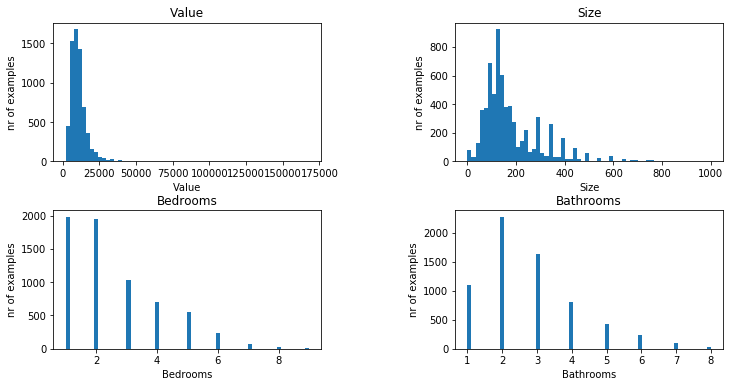

In [34]:
nrows = 2
ncols = 2
figure, subplots = plt.subplots(nrows, ncols, figsize=(12, 6))

titles = ["Value", "Size", "Bedrooms", "Bathrooms"]

for i in range(nrows):
    for j in range(ncols):
        subplots[i, j].hist(result[titles[(2*i)+j]], bins=60)
        subplots[i, j].set_xlabel(titles[(2*i)+j])
        subplots[i, j].set_ylabel('nr of examples')
        subplots[i, j].set_title(titles[(2*i)+j])
       
plt.subplots_adjust(left=None, bottom=None, right=None, 
                    top=None, wspace=0.5, hspace=0.35)

plt.show()

As you see, the data without outliers seems better, so we will use this new data from now on.

In [35]:
data = result

## Feature Engineering

In [36]:
# A look at our data currently
data.dtypes

Value                   float64
Size                    float64
Type                     object
Reference                object
Bedrooms                  int64
Bathrooms                 int64
Furnishing               object
Agency                   object
Location                 object
Nr of amenities           int64
Balcony                   int64
Barbecue Area             int64
Built in Wardrobes        int64
Central A/C               int64
Children's Play Area      int64
Children's Pool           int64
Concierge                 int64
Covered Parking           int64
Kitchen Appliances        int64
Lobby in Building         int64
MD Properties             int64
Maid Service              int64
Maids Room                int64
Networked                 int64
Pets Allowed              int64
Private Garden            int64
Private Gym               int64
Private Jacuzzi           int64
Private Pool              int64
Security                  int64
Shared Gym                int64
Shared P

Our targets will be the **Value** feature, as this is the measure which relates to the answer of our *QuAM*.

In [37]:
targets = data['Value']

We start by changing some features into category types.
These are: *Type, Furnishing, Agency*, and *Location* and make a df excluding the targets and Reference.

In [38]:
data = data.astype( {'Type':'category', 'Furnishing':'category', 
                   'Agency':'category', 'Location':'category'})
features = data.drop(['Value', 'Reference'], 1)
features

,Size,Type,Bedrooms,Bathrooms,Furnishing,Agency,Location,Nr of amenities,Balcony,Barbecue Area,...,Private Jacuzzi,Private Pool,Security,Shared Gym,Shared Pool,Shared Spa,Study,View of Landmark,View of Water,Walk-in Closet
0,60.0,Apartment,1,1,Furnished,Capstone Property,The Pearl,8,0,0,...,0,0,1,1,1,0,0,0,1,0
1,62.0,Apartment,1,1,Furnished,Capstone Property,West Bay,8,0,0,...,0,0,1,1,1,0,0,0,1,0
2,60.0,Apartment,1,1,Furnished,Capstone Property,The Pearl,9,1,0,...,0,0,1,1,1,0,0,0,1,0
3,61.0,Apartment,1,1,Partly furnished,Capstone Property,The Pearl,10,1,0,...,0,0,1,1,1,0,0,0,1,0
4,60.0,Apartment,1,1,Furnished,ABHome Real Estate,West Bay,10,0,0,...,0,0,1,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6680,700.0,Villa,9,7,Unfurnished,Steps Real Estate,Al Duhail,1,0,0,...,0,0,0,0,0,0,0,0,0,0
6681,680.0,Villa,8,6,Unfurnished,Steps Real Estate,Ain Khaled,2,1,0,...,0,0,0,0,0,0,0,0,0,0
6682,400.0,Villa,8,7,Unfurnished,Steps Real Estate,Al Gharrafa,5,1,0,...,0,0,0,0,0,0,0,1,0,0
6685,375.0,Villa,8,8,Unfurnished,Future Business,Al Hilal,5,1,0,...,0,0,0,0,0,0,0,0,0,0


## Numerical features
We want to select the features most relevant to our question, and disregard those that are redundant. 

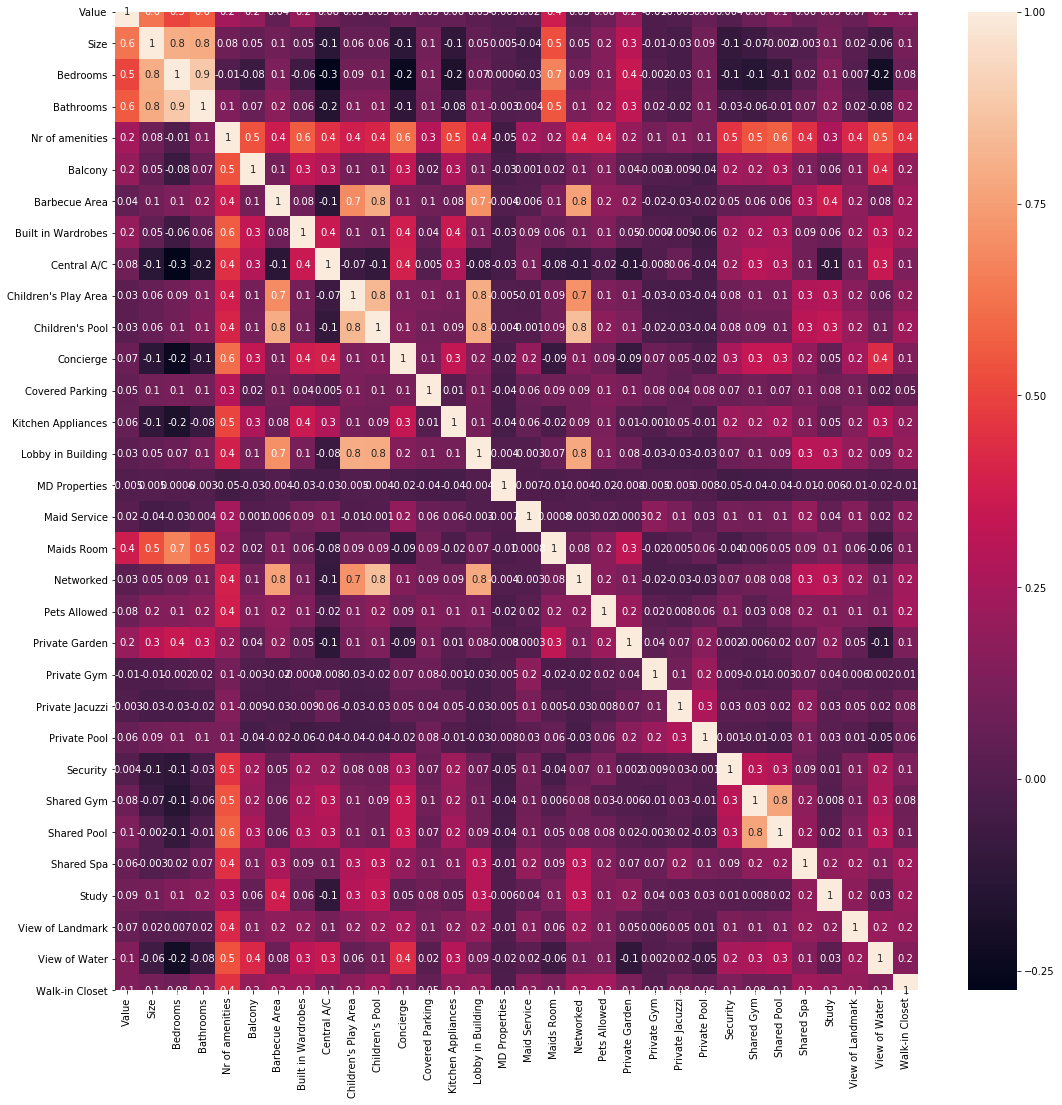

In [39]:
import seaborn as sn
plt.figure(figsize = (18,18))
correlation_matrix = data.corr()
plt.ylim(data.shape[1]+1,0)
# plt.text(j, i, format(cm[i, j], '.1f'),
# annot = True to print the values inside the square
sn.heatmap(data=correlation_matrix, annot=True, fmt='.1g')

Our first remark is that there are many features that have very little correlation with the target, therefore we decide to only keep features who's correlation with the target is above a certain threshold of: 0.2 - we know that this threshold is low but we believe that the combination of these features actually have a proper target correlation.

In [40]:
import math
#Loop through features, calculate the correlation coefficient with target and keep if >0.2
good_features = []

corr = data.corr().iloc[1:,0]
index = 1
for c in corr:
    if math.fabs(c) > 0.2:
        good_features.append(index)
    index += 1
print(good_features)

[1, 2, 3, 4, 5, 7, 17, 20]


In [41]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_data = data.select_dtypes(include=numerics)

main_num_features = numeric_data.iloc[:,good_features]
main_num_features

,Size,Bedrooms,Bathrooms,Nr of amenities,Balcony,Built in Wardrobes,Maids Room,Private Garden
0,60.0,1,1,8,0,0,0,0
1,62.0,1,1,8,0,0,0,0
2,60.0,1,1,9,1,0,0,0
3,61.0,1,1,10,1,1,0,0
4,60.0,1,1,10,0,1,0,0
...,...,...,...,...,...,...,...,...
6680,700.0,9,7,1,0,0,1,0
6681,680.0,8,6,2,1,0,0,0
6682,400.0,8,7,5,1,1,1,0
6685,375.0,8,8,5,1,0,1,1


## Categorical features
We have now extracted the important numeric features, so the next step is to binarize the categorical features in order to be able to carry out the rest of the tests on them. 

In [42]:
# First, we drop the Agency column as it carries little relevant information to the question at hand
features = features.drop('Agency', axis=1)

# Next, we carry out the binarization
category_features = features.select_dtypes(include='category')
print(category_features.columns, '\n')
main_category_features = pd.get_dummies(category_features)
main_category_features

Index(['Type', 'Furnishing', 'Location'], dtype='object') 



,Type_Apartment,Type_Compound,Type_Duplex,Type_Hotel Apartments,Type_Penthouse,Type_Townhouse,Type_Villa,Furnishing_Furnished,Furnishing_Partly furnished,Furnishing_Unfurnished,...,Location_Salata,Location_Salwa Road,Location_The Pearl,Location_Umm Al Seneem,Location_Umm Ghuwailina,Location_Umm Salal Ali,Location_Umm Salal Mohammad,Location_Wadi Al Sail,Location_West Bay,Location_West Bay Lagoon
0,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6680,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6681,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6682,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6685,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0


Now that we have all our important features sorted out, we combine them into one feature dataset.

In [43]:
main_features = pd.concat([main_num_features, main_category_features],axis=1)
main_features.describe()

,Size,Bedrooms,Bathrooms,Nr of amenities,Balcony,Built in Wardrobes,Maids Room,Private Garden,Type_Apartment,Type_Compound,...,Location_Salata,Location_Salwa Road,Location_The Pearl,Location_Umm Al Seneem,Location_Umm Ghuwailina,Location_Umm Salal Ali,Location_Umm Salal Mohammad,Location_Wadi Al Sail,Location_West Bay,Location_West Bay Lagoon
count,6580.000000,6580.000000,6580.000000,6580.000000,6580.000000,6580.000000,6580.00000,6580.000000,6580.000000,6580.000000,...,6580.000000,6580.000000,6580.000000,6580.000000,6580.000000,6580.000000,6580.000000,6580.000000,6580.000000,6580.000000
mean,184.125380,2.564134,2.756839,7.201216,0.511246,0.599696,0.19772,0.078267,0.718541,0.084498,...,0.005623,0.001216,0.383131,0.000152,0.012006,0.002432,0.019149,0.000152,0.086474,0.020517
std,127.516507,1.565994,1.413942,3.638088,0.499911,0.489997,0.39831,0.268612,0.449745,0.278155,...,0.074782,0.034850,0.486187,0.012328,0.108921,0.049255,0.137059,0.012328,0.281084,0.141770
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,100.000000,1.000000,2.000000,4.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,140.000000,2.000000,2.000000,7.000000,1.000000,1.000000,0.00000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,232.250000,3.000000,3.000000,10.000000,1.000000,1.000000,0.00000,0.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1000.000000,9.000000,8.000000,24.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


As a final step, we merge these features with our targets and create a new csv file containing our cleaned data.

In [44]:
data_clean = pd.concat([main_features, targets],axis=1)

data_clean.to_csv('data_clean.csv', index=False)